In [8]:
# Import packages
import math
import numpy as np
import matplotlib.pyplot as plt
import ar1_approx as ap

# to print plots inline
%matplotlib inline

In [20]:
β = 0.96
γ = 0.5
δ = 0.05
α = 0.4
σ = 0.2
v = 0.1
ρ = 0.8
μ = 0
u = lambda c, γ: c**(1 - γ)/(1-γ)
N = 50  # number of random draws

In [21]:
z_grid, pi = ap.addacooper(N, μ, ρ, σ)

[-0.80696893 -0.62926064 -0.54915319 -0.49238768 -0.44720176 -0.40903586
 -0.37560377 -0.34558384 -0.31813795 -0.29269838 -0.26886106 -0.24632683
 -0.22486704 -0.20430215 -0.18448782 -0.16530559 -0.14665636 -0.12845576
 -0.11063072 -0.09311689 -0.07585669 -0.05879774 -0.04189157 -0.0250926
 -0.00835718  0.00835718  0.0250926   0.04189157  0.05879774  0.07585669
  0.09311689  0.11063072  0.12845576  0.14665636  0.16530559  0.18448782
  0.20430215  0.22486704  0.24632683  0.26886106  0.29269838  0.31813795
  0.34558384  0.37560377  0.40903586  0.44720176  0.49238768  0.54915319
  0.62926064  0.80696893] [[4.22586002e-01 1.84091798e-01 1.10693930e-01 ... 1.04614526e-08
  1.77714567e-09 8.14598312e-11]
 [1.84091798e-01 1.61166861e-01 1.25324213e-01 ... 1.59001180e-07
  3.12924328e-08 1.77714568e-09]
 [1.10693930e-01 1.25324213e-01 1.10930620e-01 ... 7.30208867e-07
  1.59001180e-07 1.04614526e-08]
 ...
 [1.04614526e-08 1.59001180e-07 7.30208867e-07 ... 1.10930620e-01
  1.25324213e-01 1.1069

In [22]:
'''
Create Grid for State Space    
------------------------------------------------------------------------
lb_k      = scalar, lower bound of y grid
ub_k      = scalar, upper bound of y grid 
size_k    = integer, number of grid points in y state space
k_grid    = vector, size_w x 1 vector of y grid points 
------------------------------------------------------------------------
'''
lb_k = 0.4 
ub_k = 2.0 
size_k = 50  # Number of grid points
k_grid = np.linspace(lb_k, ub_k, size_k)

'''
------------------------------------------------------------------------
Create grid of current utility values    
------------------------------------------------------------------------
C        = matrix, current consumption (c=y-i)
u        = matrix, current period utility value for all possible
           choices of k and k' (rows are k, columns k')
------------------------------------------------------------------------
'''
C_n = np.zeros(N) # initialize array that will be populated with c at index n given z, k, and k'
C = np.zeros((size_k, size_k)) 
for i in range(size_k): # loop over k
    for j in range(size_k): # loop over k'
            for n in range(N):
                C_n[n] = (1 - δ) * pi[i,n] * k_grid[i]**α - k_grid[j]
            C[i, j] = C_n.mean()
# replace 0 and negative consumption with a tiny value 
# This is a way to impose non-negativity on cons
C[C<=0] = 1e-15
U = u(C, γ)

In [23]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol     = scalar, tolerance required for value function to converge
VFdist    = scalar, distance between last two value functions
VFmaxiter = integer, maximum number of iterations for value function
V         = vector, the value functions at each iteration
Vmat      = matrix, the value for each possible combination of w and w'
Vstore    = matrix, stores V at each iteration 
VFiter    = integer, current iteration number
TV        = vector, the value function after applying the Bellman operator
PF        = vector, indicies of choices of w' for all w 
VF        = vector, the "true" value function
------------------------------------------------------------------------
'''
VFtol = 1e-8 
VFdist = 7.0 
VFmaxiter = 3000 
V = np.zeros(size_k) # initial guess at value function
Vmat = np.zeros((size_k, size_k)) # initialize Vmat matrix
Vstore = np.zeros((size_k, VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:  
    for i in range(size_k): # loop over k
        for j in range(size_k): # loop over k'
            for k in range(size_k): # loop over z
                Vmat[i, j] = U[i, j] + β * V[j]
    Vstore[:, VFiter] = V.reshape(size_k,) # store value function at each iteration for graphing later
    TV = Vmat.max(1) # apply max operator to Vmat (to get V(w))
    PF = np.argmax(Vmat, axis=1)
    VFdist = (np.absolute(V - TV)).max()  # check distance
    V = TV
    VFiter += 1 
    
if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            

VF = V # solution to the functional equation

Value function converged after this many iterations: 48


In [25]:
'''
------------------------------------------------------------------------
Find consumption and savings policy functions   
------------------------------------------------------------------------
optk  = vector, the optimal choice of k' for each k
optC  = vector, the optimal choice of c for each c
------------------------------------------------------------------------
'''
optk = k_grid[PF] # tomorrow's optimal cake size (savings function)
optC = (1 - δ) * k_grid + pi[i,n] * k_grid**α - optk # optimal consumption - get consumption through the transition eqn

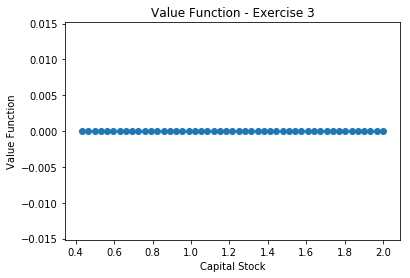

In [26]:
# Plot value function # Plot v 
plt.figure()
# plt.plot(kvec, VF)
plt.scatter(k_grid[1:], VF[1:])
plt.xlabel('Capital Stock')
plt.ylabel('Value Function')
plt.title('Value Function - Exercise 3')
plt.show()

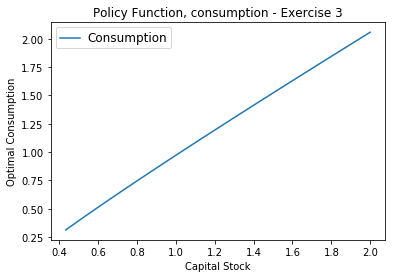

In [27]:
#Plot optimal consumption rule as a function of capital stock
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[1:], optC[1:], label='Consumption')
# Now add the legend with some customizations.
legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Capital Stock')
plt.ylabel('Optimal Consumption')
plt.title('Policy Function, consumption - Exercise 3')
plt.show()

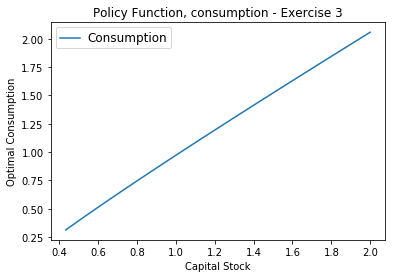

In [28]:
#Plot optimal consumption rule as a function of capital stock
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[1:], optC[1:], label='Consumption')
# Now add the legend with some customizations.
legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Capital Stock')
plt.ylabel('Optimal Consumption')
plt.title('Policy Function, consumption - Exercise 3')
plt.show()